(-123.35275, 3834.39775, -25.200000000000003, 925.2)

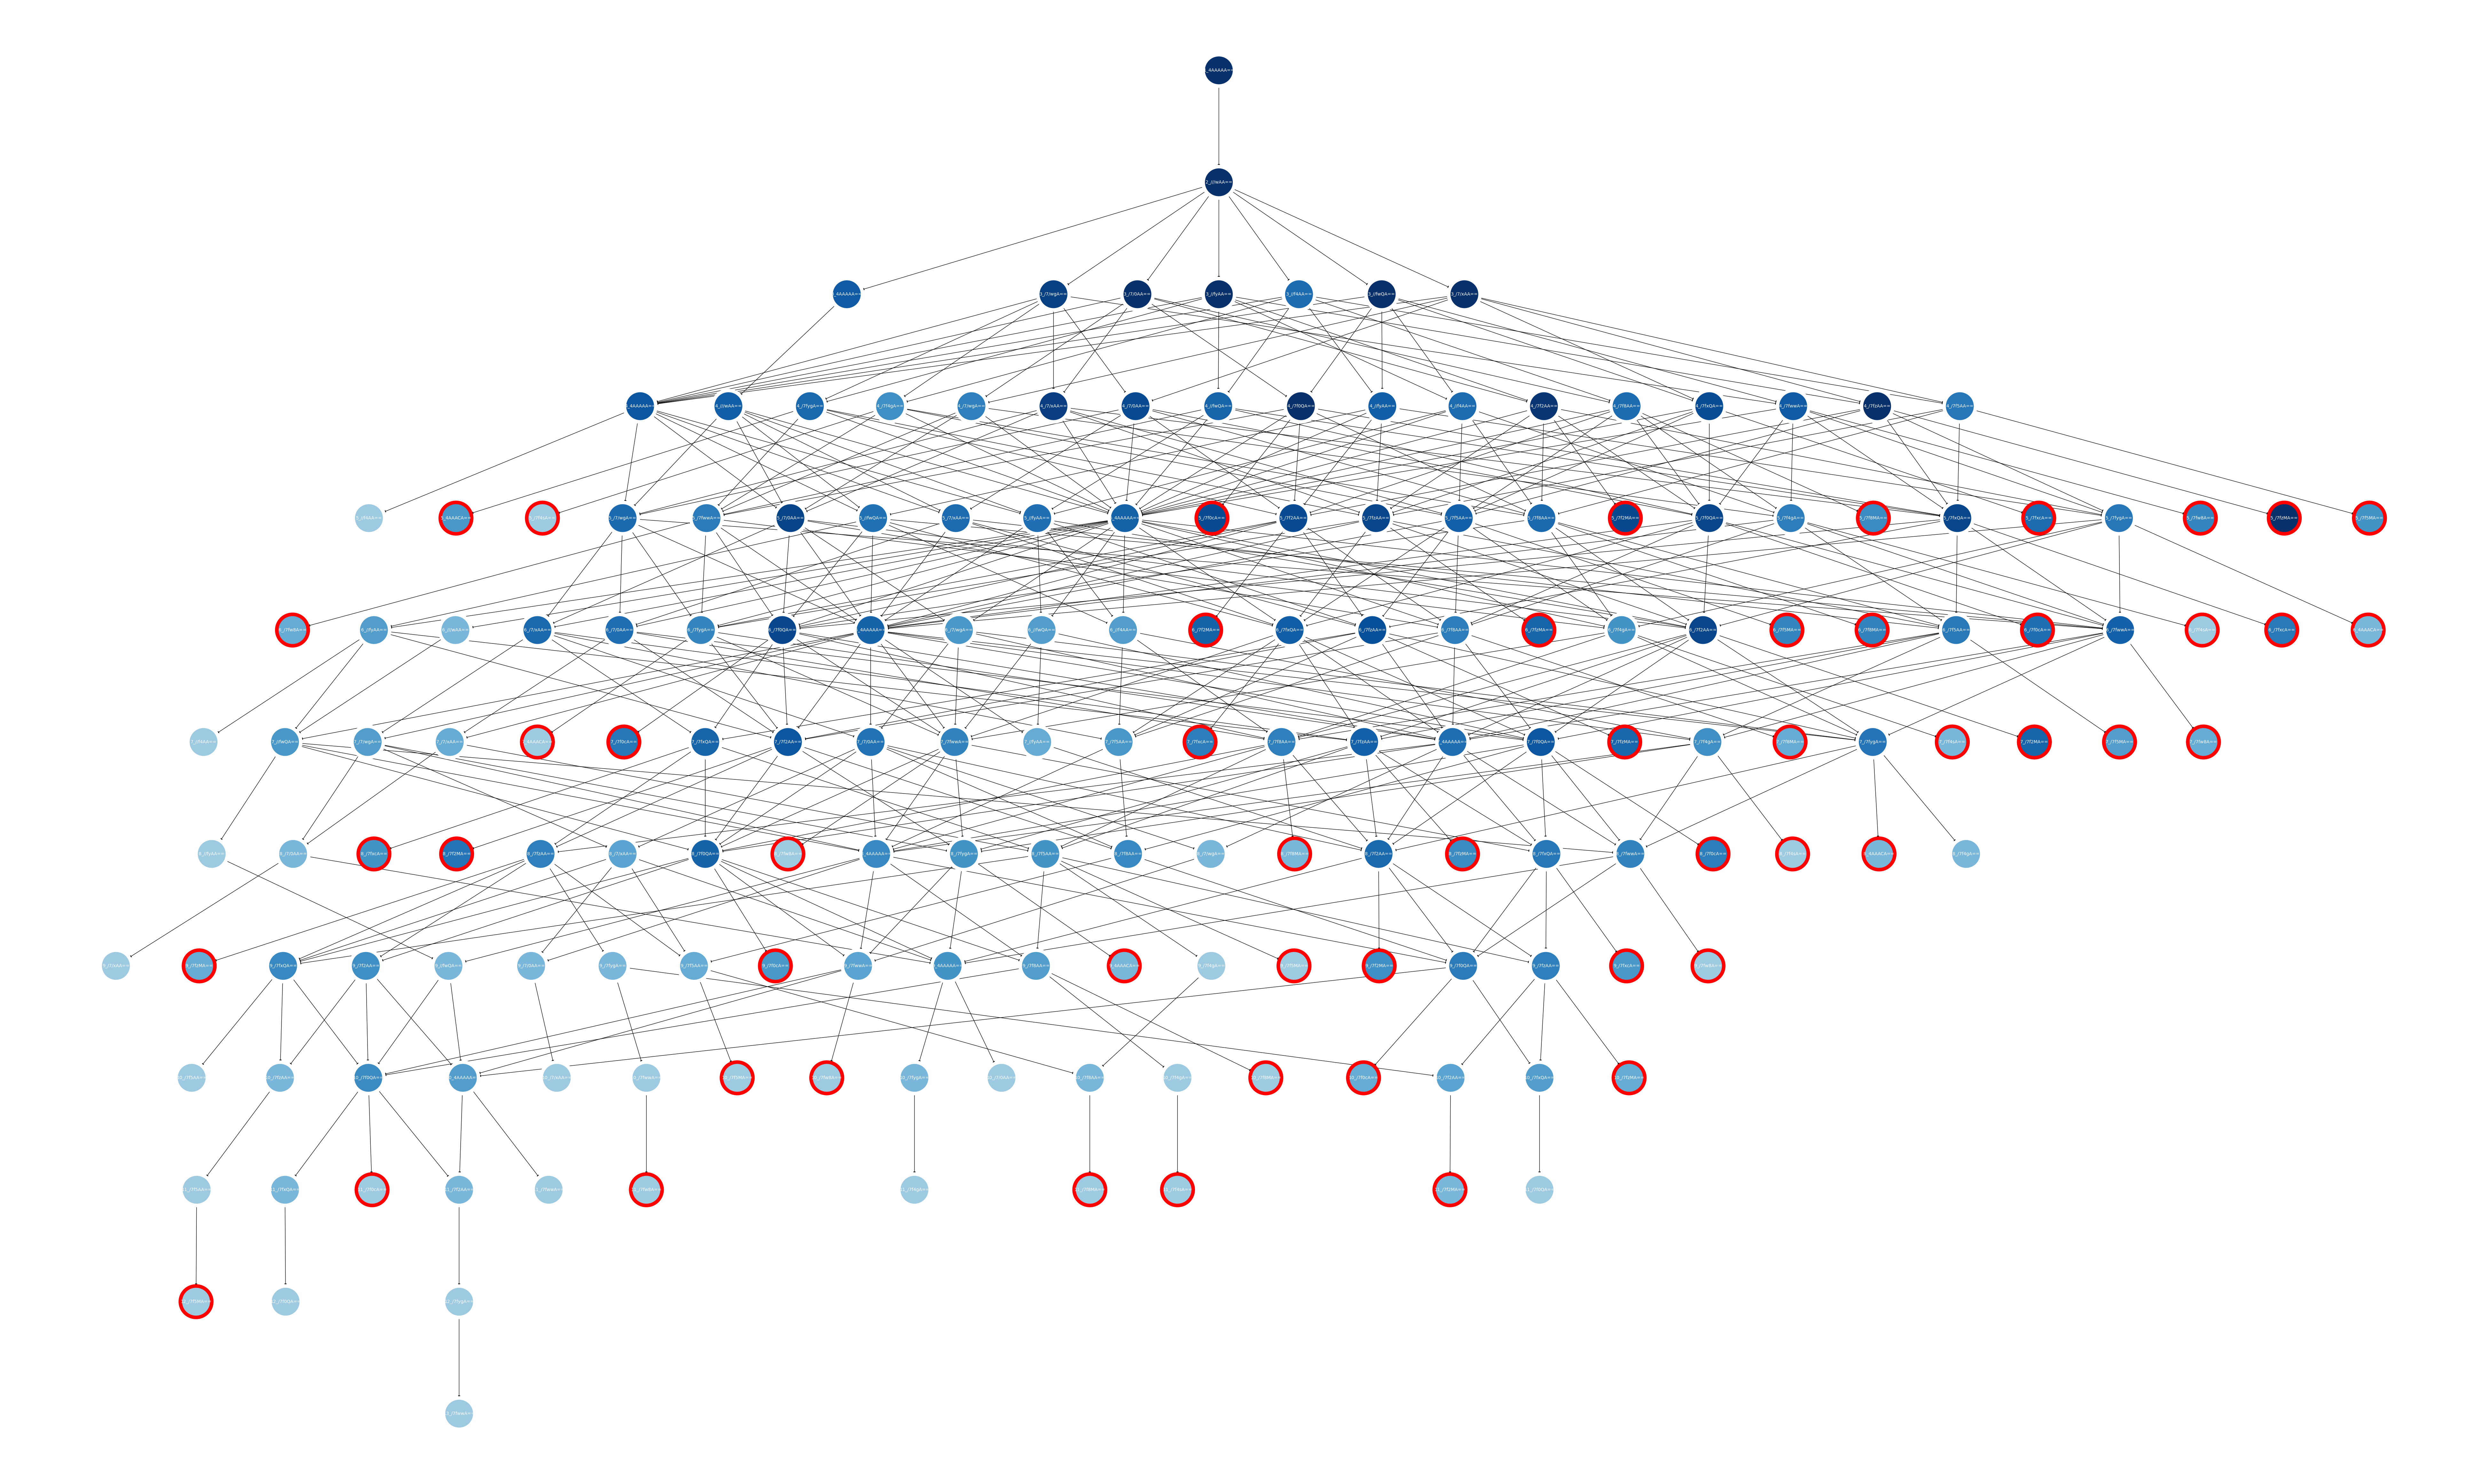

In [52]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import numpy as np

options = {
    "font_size": 10,
    "node_size": 5000,
    "cmap": plt.cm.Blues,
    "vmin": -3,
    "vmax": 5.0,
    "font_color": "white",
    "linewidths": 8,
    "width": 1,
}

G_edges = []
pos = {}
node_color = {}
edgecolors = {}
parsed_json = None

def update_colors():
    node = node_color.get(end_name)
    edge = edgecolors.get(end_name)
    if node == None:
        node = 0

    if edge != 'green':
        if layer.get(start).get(end).get('done'):
            edgecolors.update({end_name: 'red'})
        else:   
            edgecolors.update({end_name: 'white'})
    node_color.update({end_name: node + layer.get(start).get(end).get('visits')})


with open('path.json') as f:
    parsed_json = json.load(f)
    
for x, layer in enumerate(parsed_json):
    y = 0
    for start in layer.keys():
        for end in layer.get(start).keys():
            start_name = '{}_{}'.format(x, start)
            end_name = '{}_{}'.format(x+1, end)
            pos.update({end_name: (x+1, y)})
            update_colors()
            y += 1
            if x > 0:
                G_edges.append((start_name, end_name))


G = nx.DiGraph(G_edges)
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")

#node_color.update({'1_4AAAAA==': 60, '2_///wAA==': 60})
node_color = [np.log(v) for v in node_color.values()]
edgecolors = [v for v in edgecolors.values()]
plt.figure(figsize=(100, 60))
nx.draw_networkx(G, pos, node_color=node_color, edgecolors=edgecolors, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0)
plt.axis("off")